<div class="alert alert-block alert-info">
<b>

## Homework II: Machine Learning for Finance ##
### Subject: Python for Finance and Optimization ###
### Homework Submission By: DUBKOVA Ekaterina & GILL Sarbjit ### 
</b>
</div>

<div class="alert alert-block alert-warning"> 
<b> Task 1:
    In this question we ignore the identity of clients and consider that they all have the same behaviour. Write a notebook to estimate α and β using the dataset, and then evaluate the probability of a trade for each of the last 200 requests (rows).

</div>

# Task 1.1: Data Analysis

In [1]:
# Importing standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing sklearn

import sklearn
sklearn.__version__

'0.24.2'

In [3]:
# Reading data

data = pd.read_csv(r'C:\Users\ekate\Downloads\trd.csv')
n_giv = 2000 # Data with given information on deals
n_pred = 200 # Data without information on deals

<strong>Columns in the dataset:</strong>
<p><strong>midprice</strong>: the reference price of the bond at the time of the request</p>
<p><strong>id</strong>: identification of the client (4 clients)</p>
<p><strong>buy/sell</strong>: side of the request (+1 willing to buy, −1 willing to sell)</p>
<p><strong>answeredprice</strong>: the price answered by the dealer to the client as a response to request</p>
<p><strong>deal</strong>: the first 2000 rows contain 1 if the client accepted the price proposed by the dealer, and 0 otherwise. The last 200 rows contain no information about the occurrence of a trade.</p>

In [4]:
# Printing data set

data.rename(columns = {'Unnamed: 0': 'number'}, inplace = True)
data

,number,midprice,id,buy/sell,answeredprice,deal
0,0,97.9990,4,1,98.016,0.0
1,1,97.9988,4,-1,98.001,1.0
2,2,97.9951,1,-1,97.979,0.0
3,3,97.9971,1,1,97.990,1.0
4,4,97.9961,1,-1,97.978,0.0
...,...,...,...,...,...,...
2195,2195,97.9943,1,-1,97.995,NaN
2196,2196,97.9977,2,1,98.014,NaN
2197,2197,97.9999,3,1,98.009,NaN
2198,2198,98.0019,2,-1,98.007,NaN


1.0    1047
0.0     953
Name: deal, dtype: int64


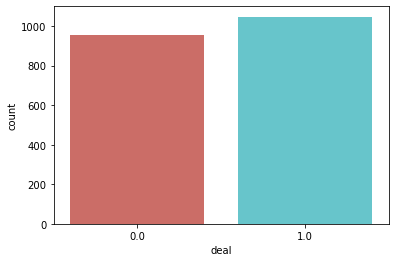

In [5]:
# Studying data

print(data['deal'].value_counts())
sns.countplot(x = 'deal', data = data, palette = 'hls')
plt.show() 

# Our data is relatively balanced as it contains approximately equal amount of accepted and rejected offers

# Task 1.2: Logistic Regression and Prediction (without distinguishing the type of client)

In [6]:
# In the next two cells, we're defining the logistic regression as specified in the homework using sklearn library and data at hand
# First, we work with our data

from sklearn.linear_model import LogisticRegression

price_dif = (data['answeredprice'] - data['midprice'])*data['buy/sell']
data['price_dif'] = price_dif # Adding the dependent variable (combination of columns)
data_giv = data[:n_giv] # For the first 2000 lines which include the information on deals

X = data_giv['price_dif'].to_numpy().reshape(-1,1) # Regressors
y = data_giv['deal'].to_numpy() # Dependent variables

data_giv

,number,midprice,id,buy/sell,answeredprice,deal,price_dif
0,0,97.9990,4,1,98.016,0.0,0.0170
1,1,97.9988,4,-1,98.001,1.0,-0.0022
2,2,97.9951,1,-1,97.979,0.0,0.0161
3,3,97.9971,1,1,97.990,1.0,-0.0071
4,4,97.9961,1,-1,97.978,0.0,0.0181
...,...,...,...,...,...,...,...
1995,1995,97.9966,1,-1,97.999,1.0,-0.0024
1996,1996,97.9958,3,-1,97.988,0.0,0.0078
1997,1997,98.0002,4,1,97.984,1.0,-0.0162
1998,1998,98.0028,2,-1,97.985,0.0,0.0178


**PLEASE NOTE: Because our dataset only contains 2200 observations and few variables, we do not need to use the standard scaler to transform the data as the gradient ascent process can be completed without it.**

In [7]:
# Logistic regression

log_reg = LogisticRegression(penalty = 'none')
log_reg.fit(X,y) # Running logistic regression

print('The estimated coefficients of logistic regression are:'
       '\nalpha =', log_reg.intercept_[0].round(4),
       '\nbeta =', log_reg.coef_[0,0].round(4))

The estimated coefficients of logistic regression are:
alpha = 0.6328 
beta = -339.6534


In [8]:
# Predicting probability for the first 2000 observations

probability_of_deal = pd.DataFrame(log_reg.predict_proba(X)).rename(columns={0: 'p(no deal)', 1: 'p(deal)'})
probability_of_deal = pd.concat([pd.DataFrame(data[:n_giv]['number']), probability_of_deal], axis = 1, ignore_index = True).rename(columns={0:'number', 1: 'p(no deal)', 2: 'p(deal)'})
probability_of_deal

,number,p(no deal),p(deal)
0,0,0.994184,0.005816
1,1,0.201010,0.798990
2,2,0.992121,0.007879
3,3,0.045464,0.954536
4,4,0.995990,0.004010
...,...,...,...
1995,1995,0.190321,0.809679
1996,1996,0.882522,0.117478
1997,1997,0.002161,0.997839
1998,1998,0.995562,0.004438


In [9]:
# Going one step further than what the question asked (an out-of-scope extra step), we are predicting the values of y for the first 2000 observations

y_pred = pd.DataFrame(log_reg.predict(X))
pd.concat([probability_of_deal, pd.DataFrame(data[:n_giv]['deal']), y_pred], axis = 1, ignore_index = True).rename(columns={0:'number', 1: 'p(no deal)', 2: 'p(deal)', 3: 'deal', 4: 'predicted deal'})

,number,p(no deal),p(deal),deal,predicted deal
0,0,0.994184,0.005816,0.0,0.0
1,1,0.201010,0.798990,1.0,1.0
2,2,0.992121,0.007879,0.0,0.0
3,3,0.045464,0.954536,1.0,1.0
4,4,0.995990,0.004010,0.0,0.0
...,...,...,...,...,...
1995,1995,0.190321,0.809679,1.0,1.0
1996,1996,0.882522,0.117478,0.0,0.0
1997,1997,0.002161,0.997839,1.0,1.0
1998,1998,0.995562,0.004438,0.0,0.0


In [10]:
# Predicting probability of bond deal for last 200 observations

data_last = data[n_giv:n_giv+n_pred] # Data without information on deals
X_last = data_last['price_dif'].to_numpy().reshape(-1,1)

y_last = pd.DataFrame(log_reg.predict(X_last)).set_index(np.arange(n_giv,n_giv+n_pred)) # In values {0,1} - predicted decision on deal
prob_last = log_reg.predict_proba(X_last) # Probability

predicted = pd.DataFrame(prob_last).rename(columns={0: 'p(no deal)', 1: 'p(deal)'})
predicted = predicted.set_index(np.arange(n_giv,n_giv+n_pred))

pd.concat([pd.DataFrame(data[n_giv:n_giv+n_pred]['number']), predicted, y_last], axis = 1, ignore_index = True).rename(columns={0:'number', 1: 'p(no deal)', 2: 'p(deal)', 3: 'predicted deal'})

,number,p(no deal),p(deal),predicted deal
2000,2000,0.241909,0.758091,1.0
2001,2001,0.003591,0.996409,1.0
2002,2002,0.995852,0.004148,0.0
2003,2003,0.012094,0.987906,1.0
2004,2004,0.037396,0.962604,1.0
...,...,...,...,...
2195,2195,0.295147,0.704853,1.0
2196,2196,0.992635,0.007365,0.0
2197,2197,0.921151,0.078849,0.0
2198,2198,0.085882,0.914118,1.0


In [11]:
# Analyzing the results using a confusion matrix and classical classification metrics: accurary, precision, recall and F1 score

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

<strong>Metrics</strong>
<p>Accuracy - measures the correct answers of the algorythm</p>
<p>Precision - the share of objects called "positive" by the algorythm and actually being positive</p>
<p>Recall - the share of positive objects which algorythm has actually found among all the positive objects</p>
<p>F1 - measure that reaches a maximum with precision and recall equal to one, and is close to zero if one of the arguments is close to zero</p>

$$ accuracy =\frac{TP+TN}{TP+TN+FP+FN} $$ 

$$ precision =\frac{TP}{TP+FP} $$

$$ recall =\frac{TP}{TP+FN} $$

$$ F_1 = \frac{2*precision*recall}{(precision)+recall} $$

In [12]:
# Measuring the model's performance using first 2000 observations with complete information in our dataset
# Comparing real Y classification and predicted Y classification using metrics above

def performance(y_real, y_predicted):
    print('The confusion matrix is:')
    print(confusion_matrix(y_real, y_predicted))
    metrics = {'Accuracy' : accuracy_score, 'Precision' : precision_score, 'Recall': recall_score, 'F1': f1_score} # dictionary
    for metric, func  in metrics.items():
        print(metric+': %.2f'%(func(y_real, y_predicted)))

performance(y, y_pred)

The confusion matrix is:
[[848 105]
 [114 933]]
Accuracy: 0.89
Precision: 0.90
Recall: 0.89
F1: 0.89


<div class="alert alert-block alert-warning"> 
<b> Task 2:
    We now consider client ids. Among the 4 clients, there are in fact two types of clients. Propose and code in the notebook a method that classifies the clients into two relevant groups as far as their behaviour is concerned.

</div>

# Task 2.1: Clusterization (kprotopypes Method)

**NOTE: If you don't have kmodes insrtalled, run the following cells**

conda install -c conda-forge kmodes

conda update -n base -c defaults conda

In [13]:
# Clusterization - kprototypes method (for mixed categorical and numerical data)

from sklearn import datasets
from kmodes.kprototypes import KPrototypes

data_used = data_giv[['id', 'deal', 'price_dif']]
data_used

model_1 = KPrototypes(n_clusters = 2, init = 'Huang', verbose = 1, n_jobs = -1, n_init = 10) #dividing clients into 2 clusters
model_1.fit_predict(data_used, categorical = [0,1]) #categorical data is specified

clusters = pd.DataFrame(model_1.labels_)

result = data.join(clusters, how='outer', sort=True).rename(columns={0: 'cluster'}).copy()
result

Best run was number 1


,number,midprice,id,buy/sell,answeredprice,deal,price_dif,cluster
0,0,97.9990,4,1,98.016,0.0,0.0170,1.0
1,1,97.9988,4,-1,98.001,1.0,-0.0022,0.0
2,2,97.9951,1,-1,97.979,0.0,0.0161,1.0
3,3,97.9971,1,1,97.990,1.0,-0.0071,0.0
4,4,97.9961,1,-1,97.978,0.0,0.0181,1.0
...,...,...,...,...,...,...,...,...
2195,2195,97.9943,1,-1,97.995,NaN,-0.0007,NaN
2196,2196,97.9977,2,1,98.014,NaN,0.0163,NaN
2197,2197,97.9999,3,1,98.009,NaN,0.0091,NaN
2198,2198,98.0019,2,-1,98.007,NaN,-0.0051,NaN


In [14]:
# Cluster centroids

model_1.cluster_centroids_

array([[-0.00677139,  4.        ,  1.        ],
       [ 0.00955675,  1.        ,  0.        ]])

Clients with ids 1 and 4 were assigned to be centroids of different clusters - we separate them in two different groups. To merge clients 2 and 3 we need to understand how is their behaviour similar to those of ids 1 and 4

In [15]:
# Checking how clients with different ids were divided into clusters
# In percentage

g = np.zeros((4,2))
n = np.zeros(4)

for i in range(4):
    n[i] = result[:n_giv][(result[:n_giv]['id'] == i+1)].shape[0]
    for j in range(2):
        g[i,j]= (result[:n_giv][(result[:n_giv]['cluster'] == j) & (result[:n_giv]['id'] == i+1)].shape[0])*100/n[i]
g = pd.DataFrame(g).set_index(np.arange(1,5)).rename(columns={0:'cluster 0', 1: 'cluster 1'}).round(2)
g

,cluster 0,cluster 1
1,46.80,53.20
2,53.49,46.51
3,50.30,49.70
4,60.74,39.26


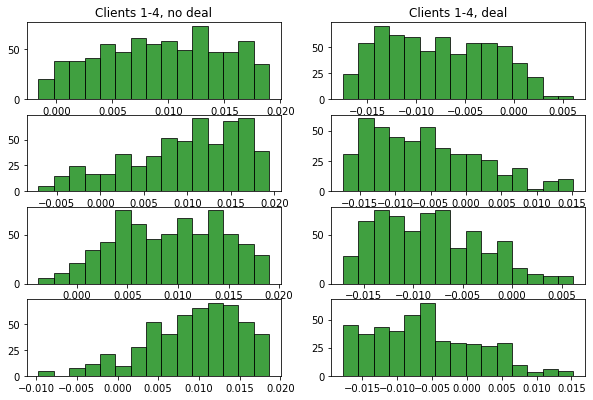

In [16]:
# Clients behaviour depending on price_dif and client id

plt.rcParams["figure.figsize"] = (10,6.5)

fig, axs = plt.subplots(nrows = 4, ncols = 2)
deal = [0,1]

for i in range(4):
    for j in range(2):
        axs[i, j].hist(data_giv['price_dif'][(data_giv['id'] == i+1) & (data_giv['deal'] == deal[j])], 15, density=True, histtype='barstacked', facecolor='g', edgecolor='black',
                       alpha=0.75)
        axs[0, 0].set_title('Clients 1-4, no deal')
        axs[0, 1].set_title('Clients 1-4, deal')


To conclude, we can say that groups 2 and 4 behave similarly (less price sensitive) - agree to make a deal at any price. At the same time, groups 1 and 3 behave more rationally and are unlikely to carry costs - price sensitive clients. We will assign all the clients with id 1 or 3 belong to cluster 0, all the customers with id 2 and 4 belong to cluster 1.

In [31]:
# We will assign all the clients with id 1 or 3 belong to cluster 0, all the customers with id 2 and 4 belong to cluster 1

result[:n_giv+n_pred].loc[(result['id'] == 1) | (result['id'] == 3), 'cluster'] = 0
result[:n_giv+n_pred].loc[(result['id'] == 2) | (result['id'] == 4), 'cluster'] = 1
result

,number,midprice,id,buy/sell,answeredprice,deal,price_dif,cluster
0,0,97.9990,4,1,98.016,0.0,0.0170,1.0
1,1,97.9988,4,-1,98.001,1.0,-0.0022,1.0
2,2,97.9951,1,-1,97.979,0.0,0.0161,0.0
3,3,97.9971,1,1,97.990,1.0,-0.0071,0.0
4,4,97.9961,1,-1,97.978,0.0,0.0181,0.0
...,...,...,...,...,...,...,...,...
2195,2195,97.9943,1,-1,97.995,NaN,-0.0007,0.0
2196,2196,97.9977,2,1,98.014,NaN,0.0163,1.0
2197,2197,97.9999,3,1,98.009,NaN,0.0091,0.0
2198,2198,98.0019,2,-1,98.007,NaN,-0.0051,1.0


In [32]:
# Saving as xlsx

with pd.ExcelWriter('output.xlsx') as writer:  
    result.to_excel(writer, sheet_name='Cluster')

In [33]:
# The amount of clients in each cluster

result['cluster'].value_counts()

# As we can see, our data is relatively balanced by clusters

1.0    1126
0.0    1074
Name: cluster, dtype: int64

<div class="alert alert-block alert-warning"> 
<b> Task 3:
    Using the identity of clients and the results of Question 2, propose and code in the notebook a new algorithm to evaluate the probability of a trade for each of the last 200 requests (rows).

</div>

# 3) Logistic Regression (two types of clients)

In [34]:
# Cluster 0 Regression

cluster_0 = result[:n_giv]
cluster_0 = cluster_0[cluster_0['cluster'] == 0]

X_cluster_0 = cluster_0['price_dif'].to_numpy().reshape(-1,1)
y_cluster_0 = cluster_0['deal'].to_numpy()

log_reg = LogisticRegression(penalty = 'none')
log_reg.fit(X_cluster_0, y_cluster_0) # Running logistic regression

print('The estimated coefficients of logistic regression are:'
       '\nalpha_0 =', log_reg.intercept_[0].round(4),
       '\nbeta_0 =', log_reg.coef_[0,0].round(4))

The estimated coefficients of logistic regression are:
alpha_0 = 0.4751 
beta_0 = -723.4436


In [35]:
# Predicting the values of y for cluster 0

y_pred_cluster_0 = log_reg.predict(X_cluster_0)

In [36]:
# Measuring cluster 0 model's performance

performance(y_cluster_0, y_pred_cluster_0)

The confusion matrix is:
[[464  31]
 [ 31 456]]
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1: 0.94


Accuracy and precision improved for cluster 0 as for more rational (price-sensitive) clients

In [37]:
# Cluster 1

cluster_1 = result[:n_giv]
cluster_1 = cluster_1[cluster_1['cluster'] == 1]

X_cluster_1 = cluster_1['price_dif'].to_numpy().reshape(-1,1)
y_cluster_1 = cluster_1['deal'].to_numpy()

log_reg = LogisticRegression(penalty = 'none')
log_reg.fit(X_cluster_1, y_cluster_1) # Running logistic regression

print('The estimated coefficients of logistic regression are:'
       '\nalpha_1 =', log_reg.intercept_[0].round(4),
       '\nbeta_1 =', log_reg.coef_[0,0].round(4))

The estimated coefficients of logistic regression are:
alpha_1 = 0.8056 
beta_1 = -260.0657


In [38]:
# Predicting the values of y for cluster 1

y_pred_cluster_1 = log_reg.predict(X_cluster_1)

In [39]:
# Measuring cluster 1 model's performance

performance(y_cluster_1, y_pred_cluster_1)

The confusion matrix is:
[[388  70]
 [ 87 473]]
Accuracy: 0.85
Precision: 0.87
Recall: 0.84
F1: 0.86


Accuracy and presision decreased for cluster 1 since for less price sensitive clients it is more complicated to predict their behaviour

In [40]:
# Selecting the last 200 observations for prediction

result_last = result[n_giv:n_giv+n_pred] # Data without information on deals
X_last = result_last['price_dif'].to_numpy().reshape(-1,1)

y_last = log_reg.predict(X_last) # In values {0,1}

In [41]:
# Cluster 0 among last 200 observations

cluster_0_last = result_last[result_last['cluster'] == 0]
cluster_0_last

,number,midprice,id,buy/sell,answeredprice,deal,price_dif,cluster
2000,2000,98.0025,3,1,98.001,NaN,-0.0015,0.0
2006,2006,97.9996,1,1,97.995,NaN,-0.0046,0.0
2007,2007,98.0039,3,1,98.017,NaN,0.0131,0.0
2009,2009,98.0002,1,-1,97.997,NaN,0.0032,0.0
2010,2010,97.9989,1,-1,97.991,NaN,0.0079,0.0
...,...,...,...,...,...,...,...,...
2188,2188,97.9901,3,-1,97.972,NaN,0.0181,0.0
2191,2191,97.9965,3,1,97.992,NaN,-0.0045,0.0
2192,2192,97.9992,1,-1,98.009,NaN,-0.0098,0.0
2195,2195,97.9943,1,-1,97.995,NaN,-0.0007,0.0


In [42]:
# Predicting probability of bond deal for last 200 observations for cluster 0

X_0_last = cluster_0_last['price_dif'].to_numpy().reshape(-1,1)

y_0_last = pd.DataFrame(log_reg.predict(X_0_last)) # In values {0,1}
prob_0_last = pd.DataFrame(log_reg.predict_proba(X_0_last)) # Probability

predicted_0 = pd.DataFrame(prob_0_last).rename(columns={0: 'p(no deal)', 1: 'p(deal)'})
cluster_0_last = cluster_0_last.set_index(np.arange(cluster_0_last.shape[0]))

pd.concat([cluster_0_last['number'], predicted_0, y_0_last], axis = 1, ignore_index = True).rename(columns={0:'number', 1: 'p(no deal)', 2: 'p(deal)', 3: 'predicted deal'})

,number,p(no deal),p(deal),predicted deal
0,2000,0.232235,0.767765,1.0
1,2006,0.118999,0.881001,1.0
2,2007,0.930940,0.069060,0.0
3,2009,0.506643,0.493357,0.0
4,2010,0.777106,0.222894,0.0
...,...,...,...,...
87,2188,0.980190,0.019810,0.0
88,2191,0.121753,0.878247,1.0
89,2192,0.033755,0.966245,1.0
90,2195,0.271370,0.728630,1.0


In [43]:
# Cluster 1 among last 200 observations

cluster_1_last = result_last[result_last['cluster'] == 1]
cluster_1_last

,number,midprice,id,buy/sell,answeredprice,deal,price_dif,cluster
2001,2001,98.0003,2,-1,98.015,NaN,-0.0147,1.0
2002,2002,98.0020,4,-1,97.984,NaN,0.0180,1.0
2003,2003,97.9991,4,1,97.988,NaN,-0.0111,1.0
2004,2004,98.0003,2,-1,98.008,NaN,-0.0077,1.0
2005,2005,97.9993,2,1,98.003,NaN,0.0037,1.0
...,...,...,...,...,...,...,...,...
2193,2193,97.9962,4,-1,98.001,NaN,-0.0048,1.0
2194,2194,97.9970,2,-1,97.996,NaN,0.0010,1.0
2196,2196,97.9977,2,1,98.014,NaN,0.0163,1.0
2198,2198,98.0019,2,-1,98.007,NaN,-0.0051,1.0


In [47]:
# Predicting probability of bond deal for last 200 observations for cluster 1

X_1_last = cluster_1_last['price_dif'].to_numpy().reshape(-1,1)

y_1_last = pd.DataFrame(log_reg.predict(X_1_last)) # In values {0,1}
prob_1_last = pd.DataFrame(log_reg.predict_proba(X_1_last)) # Probability

predicted_1 = pd.DataFrame(prob_1_last).rename(columns={0: 'p(no deal)', 1: 'p(deal)'})
cluster_1_last = cluster_1_last.set_index(np.arange(cluster_1_last.shape[0]))

pd.concat([cluster_1_last['number'], predicted_1, y_1_last], axis = 1, ignore_index = True).rename(columns={0:'number', 1: 'p(no deal)', 2: 'p(deal)', 3: 'predicted deal'})

,number,p(no deal),p(deal),predicted deal
0,2001,0.009674,0.990326,1.0
1,2002,0.979679,0.020321,0.0
2,2003,0.024307,0.975693,1.0
3,2004,0.056886,0.943114,1.0
4,2005,0.539072,0.460928,0.0
...,...,...,...,...
103,2193,0.113654,0.886346,1.0
104,2194,0.366892,0.633108,1.0
105,2196,0.968733,0.031267,0.0
106,2198,0.106028,0.893972,1.0


<div class="alert alert-block alert-info">
<b>

    Thank You!
</b>
</div>